In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from zipfile import ZipFile
import nbimporter
import random_forest_method
import performance_measure
import svm_method

Importing Jupyter notebook from random_forest_method.ipynb
Importing Jupyter notebook from performance_measure.ipynb
Importing Jupyter notebook from svm_method.ipynb


### Technique of loading data and training model simultaniously (NOT IN USE)

In [2]:
#counter = 0
#for chunk in pd.read_csv(path, chunksize=1000000): #, compression='zip'):
#    counter +=1
    # Do model training here:
#    print('Reading batch {} / 52'.format(counter), end='\r')
#print('\nReading Complete!')

### Method to print amount and percentage of statuses in datset

In [4]:
def get_statues_percentage(dataframe, description):
    status_count = dataframe.Status.value_counts()
    total_status_count = dataframe.shape[0]
    print('Proportion of failures in {}'.format(description))
    print('Status\t\t\t Percentage\t Amount')
    print('Other:\t\t\t {0:.3f}%\t {1}'.format(100*status_count[0]/(total_status_count), status_count[0]))
    print('Status_9_Substatus_8: \t {0:.3f} %\t {1}'.format(100*status_count[1]/(total_status_count), status_count[1]))
    print('Status_62_Substatus_7:\t {0:.3f}%\t\t {1}'.format(100*status_count[2]/(total_status_count), status_count[2]))
    print('Status_62_Substatus_30:\t {0:.3f}%\t\t {1}'.format(100*status_count[3]/(total_status_count), status_count[3]))
    print('')

### Create bar plot of amount of statuses

In [5]:
def plot_balance(dataframe, column):
    s = dataframe[column].value_counts()
    fig, ax = plt.subplots()

    # Remove the plot frame lines. They are unnecessary chartjunk.  
    ax = plt.subplot(111)  
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)  

    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left()  

    # Make sure your axis ticks are large enough to be easily read.  
    # You don't want your viewers squinting to read your plot.  
    plt.xticks(fontsize=14)  
    plt.yticks(fontsize=14)  

    plt.ylabel("Frequency of fault", fontsize=14)  
    plt.xlabel("Fault type", fontsize=14)  
    
    
    dataframe[column].value_counts().plot(ax=ax, kind='bar')
    plt.figure(figsize=(20, 16))

    #Save file
    plt.savefig('../Data_Plots/data_balance')
    

### Loading dataset without missing values

In [ ]:
path = "../../../all_data_filled.zip"
#'/Users⁩/mortenolsenosvik⁩/⁨XAI_Datasets⁩/Data/'
zip_file = ZipFile(path)
data = pd.read_csv(zip_file.open('all_data_filled.csv')) #, nrows=500000)
#data = pd.read_csv(path, compression='zip', sep=',')#, nrows=500000)

### Undersampling the dataset 

In [ ]:
def undersample_dataset(dataset, sample_amount,target_value):
    # Extract each status
    others = dataset.loc[dataset['Status'] == 'Other']
    status_9_Substatus_8   = dataset.loc[dataset['Status'] == 'Status_9_Substatus_8']
    status_62_Substatus_7  = dataset.loc[dataset['Status'] == 'Status_62_Substatus_7']
    status_62_Substatus_30 = dataset.loc[dataset['Status'] == 'Status_62_Substatus_30']

    # undersample the class in the argument
    
    if (target_value == "Other"):
        others = others.sample(sample_amount, random_state = 12)
        
    if (target_value == "Status_9_Substatus_8"):
        status_9_Substatus_8 = status_9_Substatus_8.sample(sample_amount, random_state = 12)
        
    if (target_value == "Status_62_Substatus_7"):
        status_62_Substatus_7 = Status_62_Substatus_7.sample(sample_amount, random_state = 12)
        
    if (target_value == "Status_62_Substatus_30"):
        status_62_Substatus_30 = Status_62_Substatus_30.sample(sample_amount, random_state = 12)

    # Concat the new data set
    undersampled_data = pd.concat([others, status_9_Substatus_8, 
                                   status_62_Substatus_7, status_62_Substatus_30], ignore_index=True)
    # Shuffle it
    undersampled_data = shuffle(undersampled_data)
    
    # Reset the index
    undersampled_data.reset_index(inplace=True, drop=True)

    # Save dataframe to csv
    #undersampled_data.to_csv('../../../../../../XAI_Datasets/Data/undersampled_data.csv', 
    #                         encoding='utf-8', index=False)
    
    return undersampled_data


In [6]:
undersampled_data = undersample_dataset(data, 300000,"Other")
#get_statues_percentage(data, 'the unprocessed dataset')
#get_statues_percentage(undersampled_data, 'the undersampled dataset')


NameError: name 'undersample_dataset' is not defined

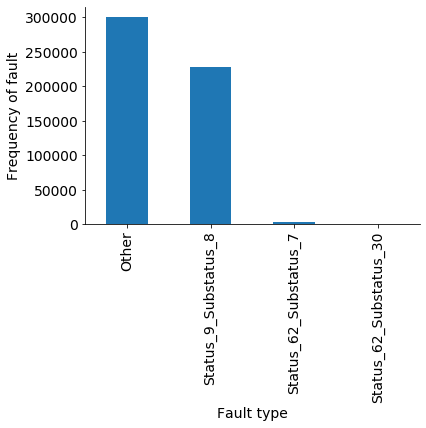

<Figure size 1440x1152 with 0 Axes>

In [7]:
plot_balance(undersampled_data, 'Status')